<a href="https://colab.research.google.com/github/mmalinda/World-Happiness-Report/blob/master/World_Happiness_Report_(Master).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report
Rankings of national happiness based on respondent ratings of their own lives based on ranking of 1 to 10.

Report also correlates happiness score with various life factors such as economic production, social support, life expectancy, freedom, absence of corruption, and generosity contribute to the happiness score

Data collected from Kaggle for rankings between 2015 and 2019.

Research question : What factors influence the happiness of citizens the most?

## Import Libraries and Data

In [0]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [0]:
#Import data
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

## Exploring the Data

### **Previewing the Datasets**



In [93]:
# previewing the 2015 dataset
# 
df_2015.head()

Country          Region  ...  Generosity  Dystopia Residual
0  Switzerland  Western Europe  ...     0.29678            2.51738
1      Iceland  Western Europe  ...     0.43630            2.70201
2      Denmark  Western Europe  ...     0.34139            2.49204
3       Norway  Western Europe  ...     0.34699            2.46531
4       Canada   North America  ...     0.45811            2.45176

[5 rows x 12 columns]

In [94]:
# previewing the 2016 dataset
# 
df_2016.head()

Country          Region  ...  Generosity  Dystopia Residual
0      Denmark  Western Europe  ...     0.36171            2.73939
1  Switzerland  Western Europe  ...     0.28083            2.69463
2      Iceland  Western Europe  ...     0.47678            2.83137
3       Norway  Western Europe  ...     0.37895            2.66465
4      Finland  Western Europe  ...     0.25492            2.82596

[5 rows x 13 columns]

In [95]:
# previewing the 2017 dataset
# 
df_2017.head()

Country  ...  Dystopia.Residual
0       Norway  ...           2.277027
1      Denmark  ...           2.313707
2      Iceland  ...           2.322715
3  Switzerland  ...           2.276716
4      Finland  ...           2.430182

[5 rows x 12 columns]

In [96]:
# previewing the 2018 dataset 
# 
df_2018.head()

Overall rank Country or region  ...  Generosity  Perceptions of corruption
0             1           Finland  ...       0.202                      0.393
1             2            Norway  ...       0.286                      0.340
2             3           Denmark  ...       0.284                      0.408
3             4           Iceland  ...       0.353                      0.138
4             5       Switzerland  ...       0.256                      0.357

[5 rows x 9 columns]

In [97]:
# previewing the 2019 dataset
# 
df_2019.head()

Overall rank Country or region  ...  Generosity  Perceptions of corruption
0             1           Finland  ...       0.153                      0.393
1             2           Denmark  ...       0.252                      0.410
2             3            Norway  ...       0.271                      0.341
3             4           Iceland  ...       0.354                      0.118
4             5       Netherlands  ...       0.322                      0.298

[5 rows x 9 columns]

The data is similar but the columns are not uniform across the years.

### Merging the Dataframes

Merging the dataframes together to create one harmonious dataframe to be used during analysis. 

In [98]:
#Checking that the columns are the same to merge the dataframes
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

In [0]:
# the columns have some uncommon variables which we have decided to drop for a uniform dataset.
#Dropping columns that are not common to all years
# 
df_2015.drop(columns=['Standard Error', 'Region', 'Dystopia Residual'], inplace=True)
df_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Region', 'Dystopia Residual'], inplace=True)
df_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], inplace=True)


In [0]:
# The 2017 dataset has a different order from the other datasets
# Changing the order of 2017 dataframe
# 

df_2017 = df_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity']]

In [0]:
# Adding a column with the year of data collection
# 
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

In [0]:
# Reorder the columns so as to have same order across all the years
# 
df_2015 = df_2015[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
df_2016 = df_2016[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)', 'Year']]
df_2017 = df_2017[['Happiness.Rank', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Generosity', 'Trust..Government.Corruption.', 'Year']]

In [0]:
#Rename the columns
# 
df_2015.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
df_2016.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
df_2017.columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']

In [104]:
#Checking the column names
# 
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')
Index(['Overall rank', 'Coun

In [105]:
# Merging the data
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])
df_all.head()

Overall rank Country or region  ...  Perceptions of corruption  Year
0             1       Switzerland  ...                    0.41978  2015
1             2           Iceland  ...                    0.14145  2015
2             3           Denmark  ...                    0.48357  2015
3             4            Norway  ...                    0.36503  2015
4             5            Canada  ...                    0.32957  2015

[5 rows x 10 columns]

The merge was successful.

### Data Understanding

In [106]:
#Check sample data
df_all.head()

Overall rank Country or region  ...  Perceptions of corruption  Year
0             1       Switzerland  ...                    0.41978  2015
1             2           Iceland  ...                    0.14145  2015
2             3           Denmark  ...                    0.48357  2015
3             4            Norway  ...                    0.36503  2015
4             5            Canada  ...                    0.32957  2015

[5 rows x 10 columns]

In [107]:
# previewing the tail of the dataset
# 
df_all.tail()

Overall rank         Country or region  ...  Perceptions of corruption  Year
151           152                    Rwanda  ...                      0.411  2019
152           153                  Tanzania  ...                      0.147  2019
153           154               Afghanistan  ...                      0.025  2019
154           155  Central African Republic  ...                      0.035  2019
155           156               South Sudan  ...                      0.091  2019

[5 rows x 10 columns]

The data is ordered by year and happiness score.

In [108]:
# showing the shape of the datasdet
# 
df_all.shape

(782, 10)

Dataset has 782 rows and 10 columns

In [109]:
#Explore the column data types
# 
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
Overall rank                    782 non-null int64
Country or region               782 non-null object
Score                           782 non-null float64
GDP per capita                  782 non-null float64
Social support                  782 non-null float64
Healthy life expectancy         782 non-null float64
Freedom to make life choices    782 non-null float64
Generosity                      782 non-null float64
Perceptions of corruption       781 non-null float64
Year                            782 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


1 column is of string date type while rest are numeric.

In [110]:
#Check Null Columns
df_all.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

We will replace the null record in the dataset with a median value.

In [0]:
#Replacing missing values with median. Reason: Column has outlier hence median is better than mean.
df_all['Perceptions of corruption'].fillna((df_all['Perceptions of corruption'].median()), inplace=True)

In [112]:
# Checking for duplicates
df_all.duplicated().sum()

0

There are no duplicated records in the data set.

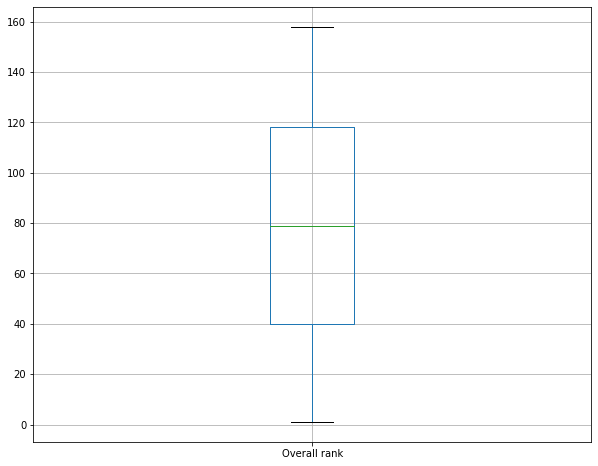

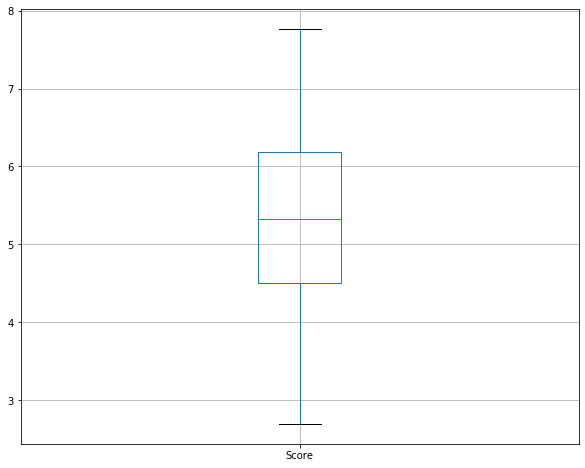

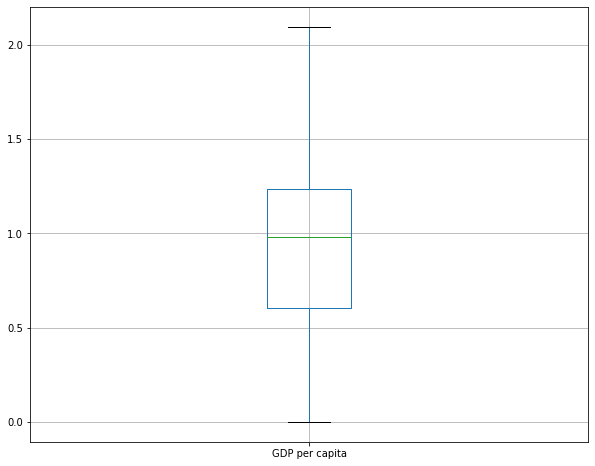

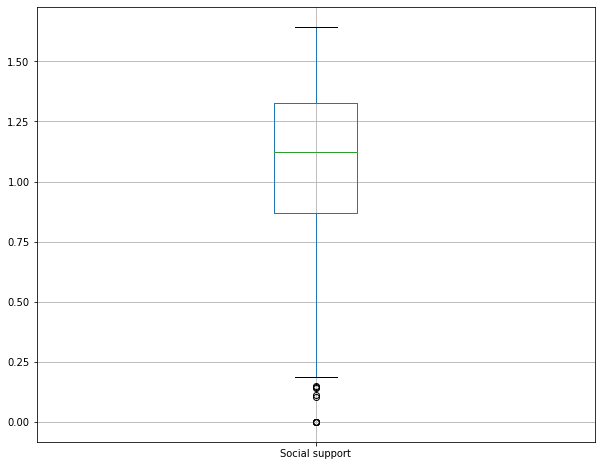

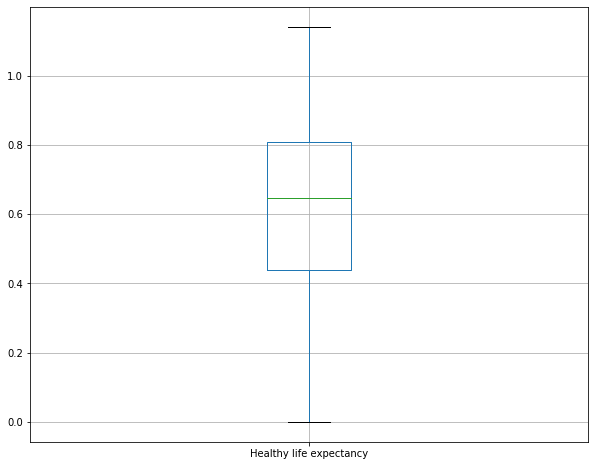

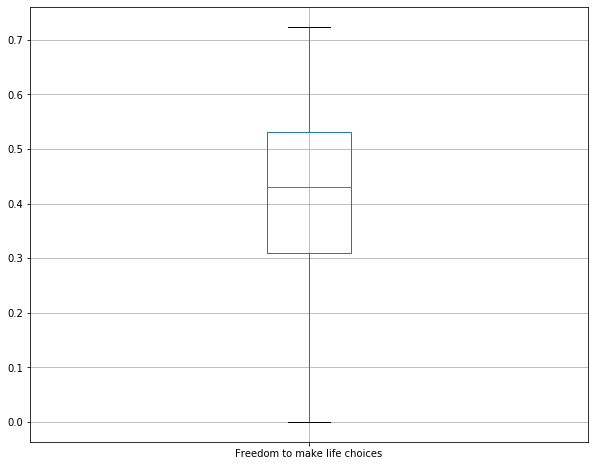

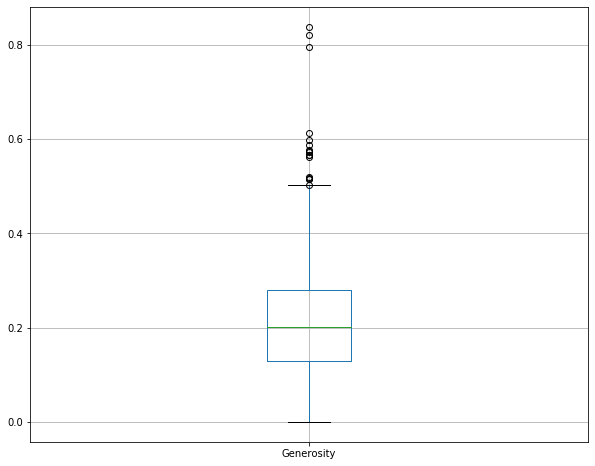

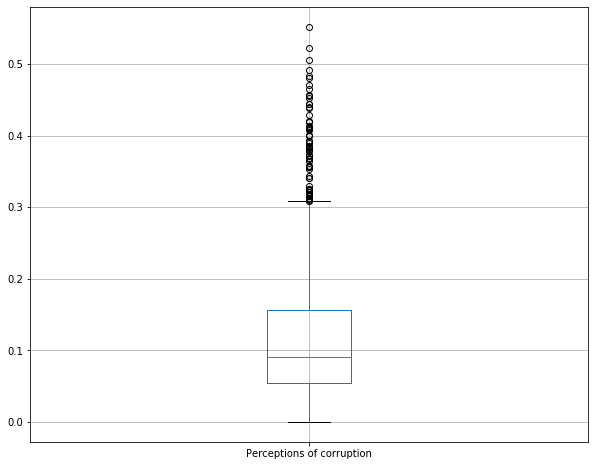

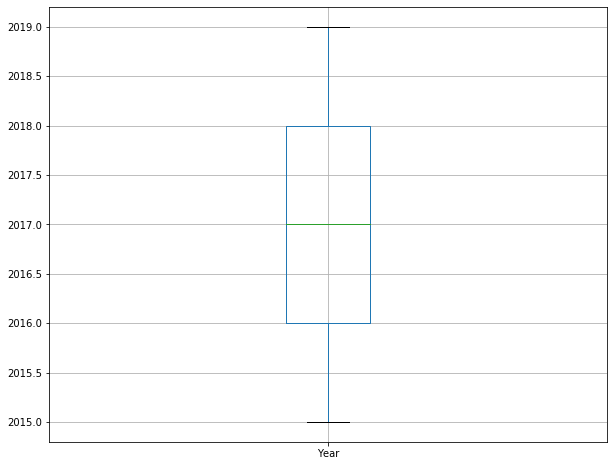

In [113]:
# Using boxplots to check for outliers
num_cols = df_all.select_dtypes('number').columns

for col in num_cols:
  plt.figure(figsize = (10, 8))
  df_all.boxplot([col])

The data has outliers and hence will need to be scaled for modelling.

In [0]:
# making a csv copy of the new merged dataset
# 
df_all.to_csv('happiness.csv')

## Exploratory Data Analysis

### Univariate Analysis


a) Statistical Description


In [115]:
df_all.describe()

Overall rank       Score  ...  Perceptions of corruption         Year
count    782.000000  782.000000  ...                 782.000000   782.000000
mean      78.698210    5.379018  ...                   0.125392  2016.993606
std       45.182384    1.127456  ...                   0.105756     1.417364
min        1.000000    2.693000  ...                   0.000000  2015.000000
25%       40.000000    4.509750  ...                   0.054250  2016.000000
50%       79.000000    5.322000  ...                   0.091000  2017.000000
75%      118.000000    6.189500  ...                   0.155861  2018.000000
max      158.000000    7.769000  ...                   0.551910  2019.000000

[8 rows x 9 columns]

b) Numerical variables Distribution

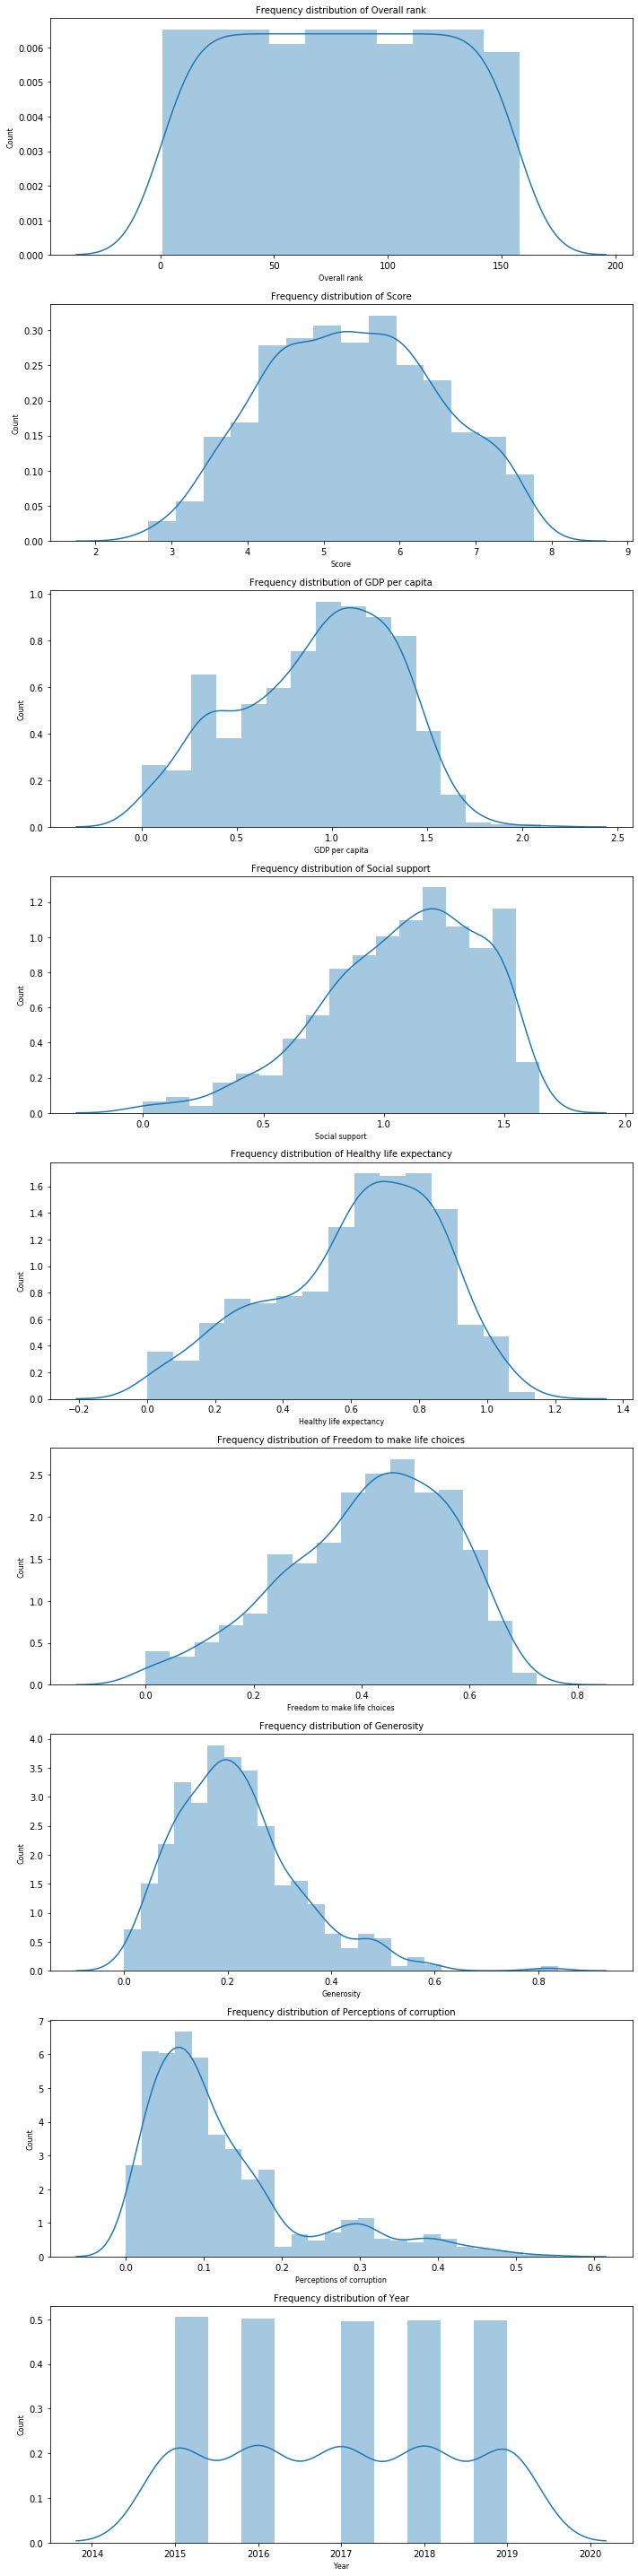

In [116]:
# Plotting distribution of numerical variables
fig, ax = plt.subplots(len(num_cols), figsize=(10,40))

for i, col_val in enumerate(num_cols):

    sns.distplot(df_all[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

In [117]:
# Checking kurtosis and skewness of numerical variables
for i, col_val in enumerate(num_cols):

    print(col_val)
    print("Skewness:", df_all[col_val].skew())
    print("Kurtosis:", df_all[col_val].kurt())


Overall rank
Skewness: 0.0004973514565178652
Kurtosis: -1.1997011261617596
Score
Skewness: 0.035859433273691114
Kurtosis: -0.7610545865625724
GDP per capita
Skewness: -0.3185805094075457
Kurtosis: -0.6927595053792621
Social support
Skewness: -0.6846322897626194
Kurtosis: 0.15844868331084427
Healthy life expectancy
Skewness: -0.5012025621921573
Kurtosis: -0.4875712070381275
Freedom to make life choices
Skewness: -0.5212591254144608
Kurtosis: -0.30720540611495917
Generosity
Skewness: 1.0443600152578012
Kurtosis: 2.020258278370997
Perceptions of corruption
Skewness: 1.522756372214541
Kurtosis: 1.8875809619169508
Year
Skewness: 0.005903894402712499
Kurtosis: -1.3052698057390655


**Observations**
**a) Skewness**

1. Most of the data distributions are slightly skewed, with the exception of generousity and perceptions of corruption which are positively skewed.

**b) Kurtosis**
1. The distributions for all the variables are platkurtic as they have low kurtosis. This is especially apparent for overall rank and score.

### Bi-variate analysis

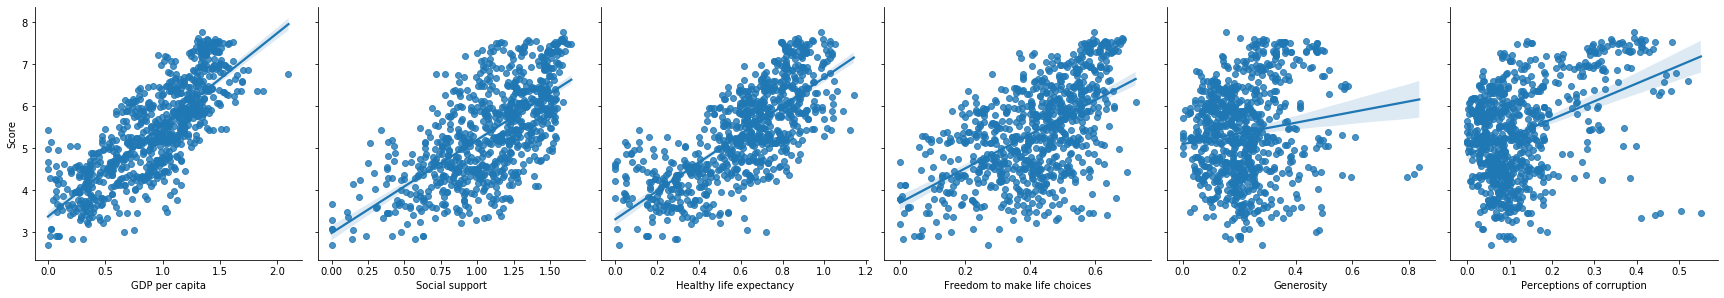

In [118]:
# Plotting all features against happiness score
g = sns.PairGrid(df_all, y_vars=['Score'], x_vars=['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], height=4)
g.map(sns.regplot)

The features all seem to have a linear relationship with happiness score.
GDP per capita appears to have the strongest correlation to happiness score, and generosity to weakest correlation.

<function matplotlib.pyplot.show>

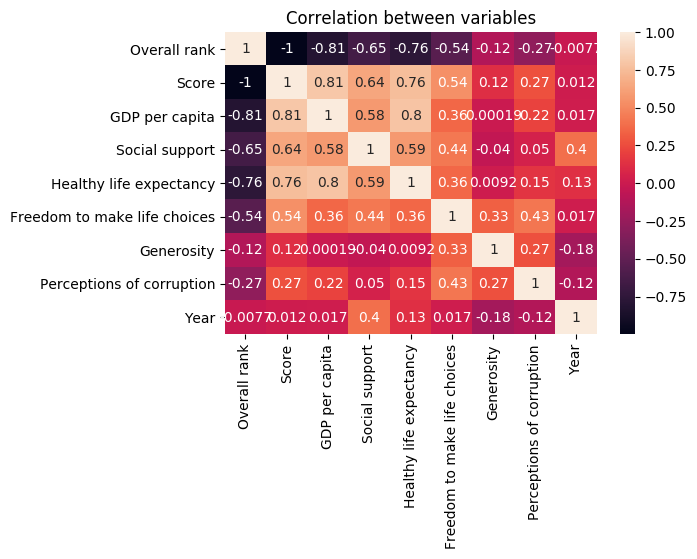

In [119]:
#Checking for correlations between the variables
plt.figure(dpi=100)
cor=df_all.corr(method = 'spearman')
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.xticks( rotation=90)
plt.title('Correlation between variables')
plt.show

Score is highly correlated to GDP per capita and health, and weakly correlated to generosity and perceptions of corruptions. 

## Modeling

In [0]:
#start our modelling by dropping the unecessary columns
#use of standard scaler that scales thedata to a mean of 0 ad standard dev 1.
#useful for negative values,arrange data to normal distribution
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df_mod = df_all.drop(columns = ['Overall rank', 'Country or region', 'Year'])

df_all = scaler.fit_transform(df_mod)


In [0]:
#dataframe that contains our features with column names
names = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
df_all = pd.DataFrame(df_all, columns=names)

In [122]:
# Previewing new dataframe
df_all

Score  GDP per capita  ...  Generosity  Perceptions of corruption
0    1.959628        1.180267  ...    0.639746                   2.785442
1    1.936552        0.948887  ...    1.781084                   0.151941
2    1.906377        1.005780  ...    1.004676                   3.389010
3    1.901939        1.333775  ...    1.050487                   2.267409
4    1.817625        1.007770  ...    1.959500                   1.931894
..        ...             ...  ...         ...                        ...
777 -1.814994       -1.368399  ...   -0.012891                   2.702368
778 -1.906409       -1.080986  ...    0.469756                   0.204454
779 -1.931259       -1.390508  ...   -0.495538                  -0.949884
780 -2.037761       -2.186421  ...    0.134357                  -0.855266
781 -2.241891       -1.498595  ...   -0.135598                  -0.325406

[782 rows x 7 columns]

In [0]:
#Spliting out data to independent and dependent features
#data split to training 80 and testing 20 
X = df_all[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

y = df_all['Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

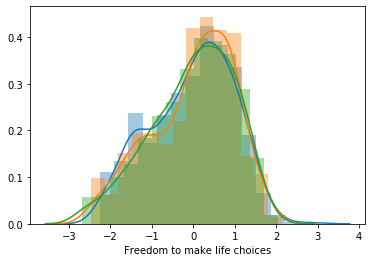

In [124]:
# Visualizing the distribution of train data after scaling
cols = ['GDP per capita',
        'Healthy life expectancy',
       'Freedom to make life choices']

for col in cols:
  sns.distplot(X_train[col])

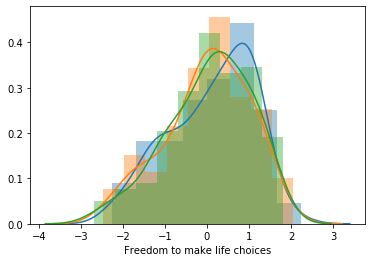

In [125]:
# Visualizing the distribution of test data after scaling
cols = ['GDP per capita',
        'Healthy life expectancy',
       'Freedom to make life choices']

for col in cols:
  sns.distplot(X_test[col])

The distributions are fairly similar now and closer to normal distribution.

#### **BASELINE MODEL**

**DECISION TREE**

In [126]:
# creating a decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
tree = DecisionTreeRegressor(max_depth = 6, random_state = 42)

# Training the model on the training dataset
tree = tree.fit(X_train, y_train)

# predict based on the trained model 
y_pred = tree.predict(X_test)

# checking for the accuracy of the model 
print("The accuracy on the training dataset is: %f " %tree.score(X_train, y_train))
print("The accuracy on the testing dataset is: %f " %tree.score(X_test, y_test))

The accuracy on the training dataset is: 0.867949 
The accuracy on the testing dataset is: 0.704594 


The model parameters were tuned manually.

This accuracy is okay, but the model seems to be overfitted to the train.

       Actual  Predicted
382  0.129562   0.669081
487  1.337477   1.391665
351  0.856441   0.987382
14   1.544269   1.391665
145 -1.418273  -1.169274


Text(0.5, 1.0, 'Model Predictions')

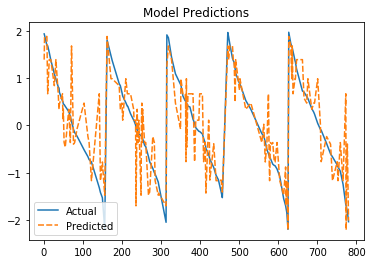

In [127]:
# comparing actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

sns.lineplot(data=comparison_df)
plt.title("Model Predictions")

The predictions made by the model are quite accurate, and the prediction accuracy is constant across the range of values.

Visualizing the tree

In [0]:
# creating a list with the test features
test_features = ['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

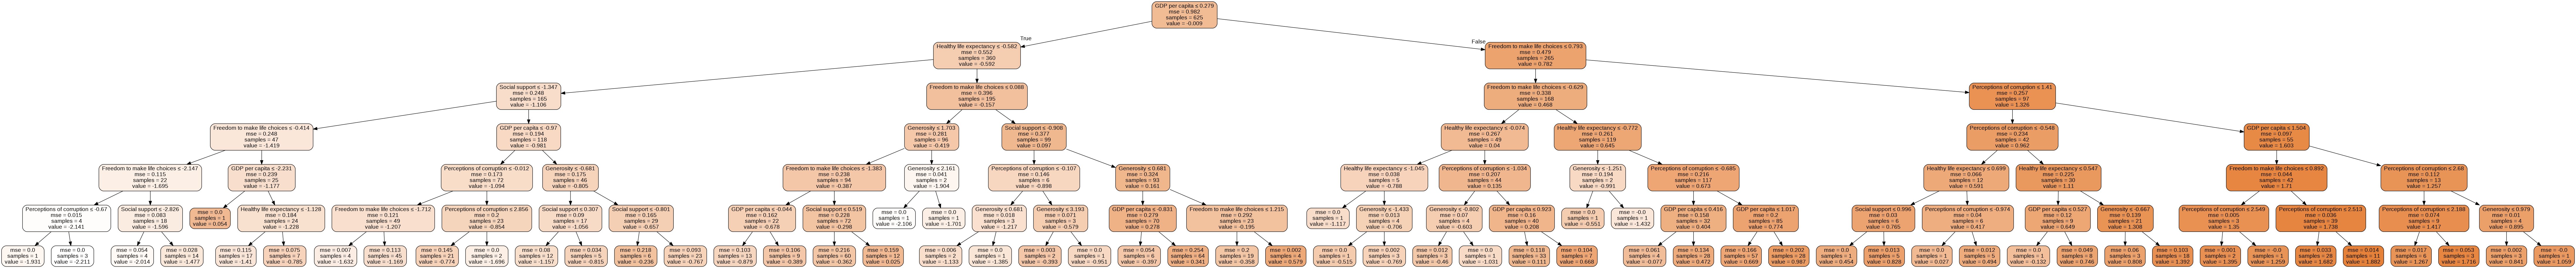

In [129]:
# Visualizing and saving the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('World_Happiness.png')
Image(graph.create_png())

In [130]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# Sorting feature importances in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: GDP per capita       Importance: 0.57
Variable: Healthy life expectancy Importance: 0.18
Variable: Freedom to make life choices Importance: 0.15
Variable: Perceptions of corruption Importance: 0.04
Variable: Social support       Importance: 0.03
Variable: Generosity           Importance: 0.02


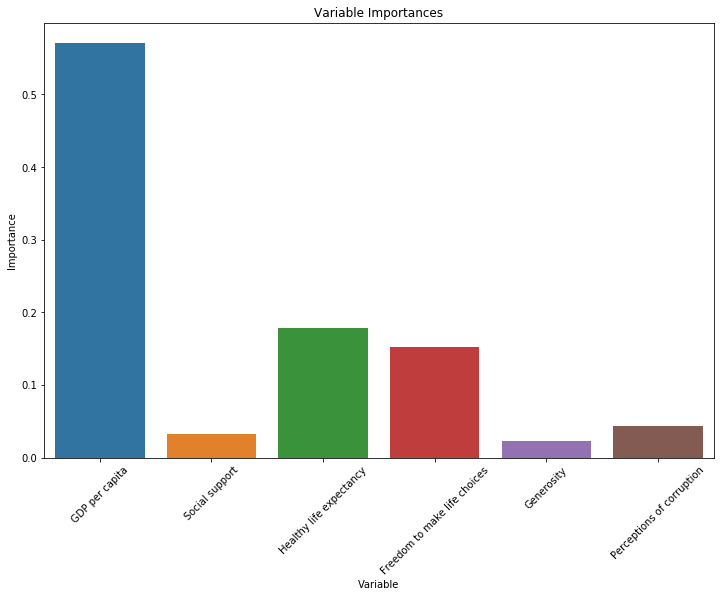

In [131]:
# Listing x locations for plotting
x_values = list(range(len(importances)))
plt.figure(figsize = (12, 8))
# Plotting a bar chart
sns.barplot(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation = 45
           )
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

With the decision tree model, the most important factor for happiness of citizens is GDP per capita, followed by health and freedom. Generosity and social support are not essential.

The random forest bagging method can be used to reduce overfitting.

#### **RANDOM FOREST APPROACH**

In [132]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Building the model
forest = RandomForestRegressor(n_estimators = 40, random_state=42, min_samples_split = 5, max_depth=8)
forest = forest.fit(X_train, y_train)

# Making predictions based on the model we've trained
y_pred_forest = forest.predict(X_test)

# Checking the accuracy of the model 
print("The accuracy on the training dataset is: %f " %forest.score(X_train, y_train))
print("The accuracy on the testing dataset is: %f " %forest.score(X_test, y_test))

The accuracy on the training dataset is: 0.933228 
The accuracy on the testing dataset is: 0.802480 


This accuracy is improved, although the overfitting problem still exists.

       Actual  Predicted
382  0.129562   0.404382
487  1.337477   1.271381
351  0.856441   0.757150
14   1.544269   1.283311
145 -1.418273  -1.056891


Text(0.5, 1.0, 'Model Predictions')

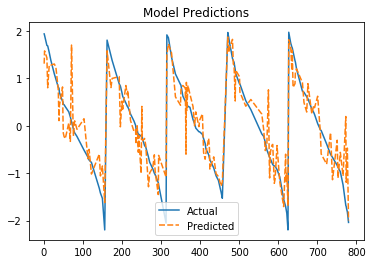

In [133]:
# comparing actual vs predicated values
comparison_forest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})

print(comparison_forest.head())

sns.lineplot(data=comparison_forest)
plt.title('Model Predictions')

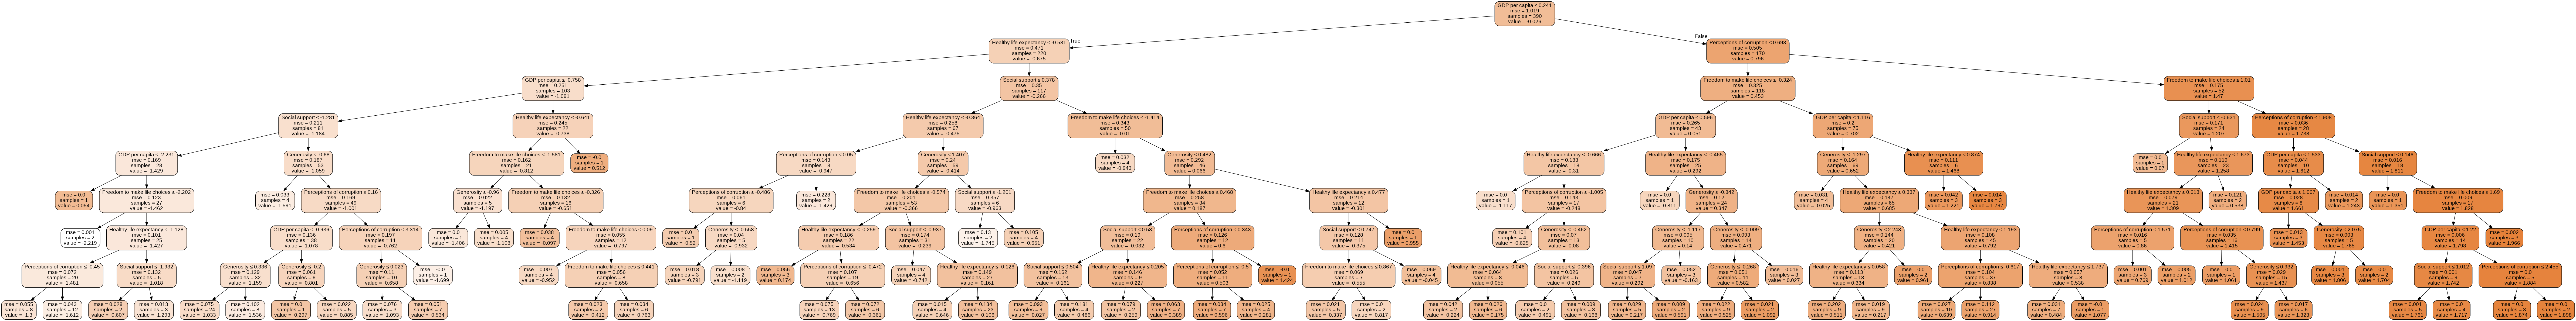

In [134]:
# visualizing the a Random forest tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

tree = forest.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('World_Happiness_forest.png')
Image(graph.create_png())

In [135]:
# Getting numerical feature importances
importances = list(forest.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: GDP per capita       Importance: 0.44
Variable: Healthy life expectancy Importance: 0.33
Variable: Freedom to make life choices Importance: 0.09
Variable: Perceptions of corruption Importance: 0.06
Variable: Social support       Importance: 0.04
Variable: Generosity           Importance: 0.04


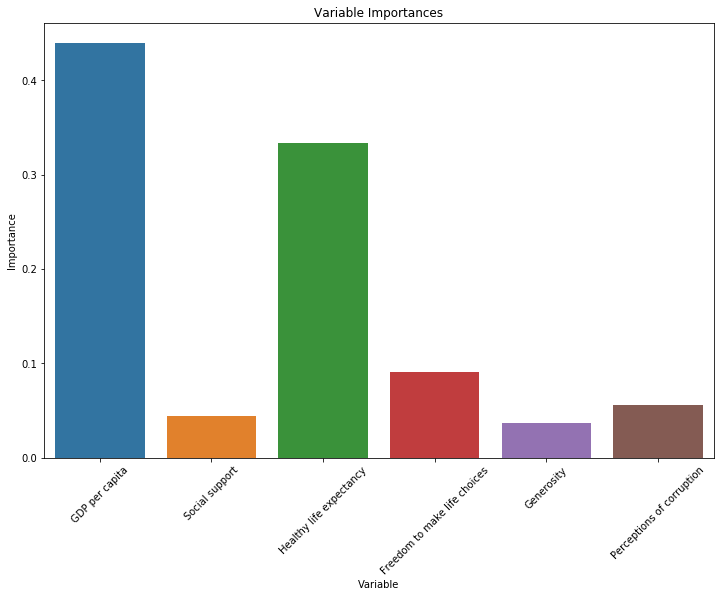

In [136]:
# Listing x locations for plotting
x_values = list(range(len(importances)))
plt.figure(figsize = (12, 8))
# Plotting a bar chart
sns.barplot(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation = 45
           )
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The random forest model gave a better accuracy, but did not solve the overfitting problem.

According to this model, GDP per capita is still the highest contributing factor to happiness of citizens. Health has a much higher weight in this model.

Boosting may be used to decrease overfitting for this model.

#### **Boosting The Models**

In [159]:
# Building the gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state = 42, n_estimators= 450, learning_rate=0.01, max_depth= 3)
gbr = gbr.fit(X_train, y_train)

# checking for the accuracy of the model 
print("The accuracy on the training dataset is: %f " %gbr.score(X_train, y_train))
print("The accuracy on the testing dataset is: %f " %gbr.score(X_test, y_test))

The accuracy on the training dataset is: 0.871188 
The accuracy on the testing dataset is: 0.793194 


Boosting has solved the overfitting problem and maintains similar accuracy to the random forest model on the testing data.

In [160]:
# Getting numerical feature importances
importances = list(gbr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# Sorting in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the feature importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: GDP per capita       Importance: 0.49
Variable: Healthy life expectancy Importance: 0.29
Variable: Freedom to make life choices Importance: 0.1
Variable: Social support       Importance: 0.05
Variable: Perceptions of corruption Importance: 0.05
Variable: Generosity           Importance: 0.02


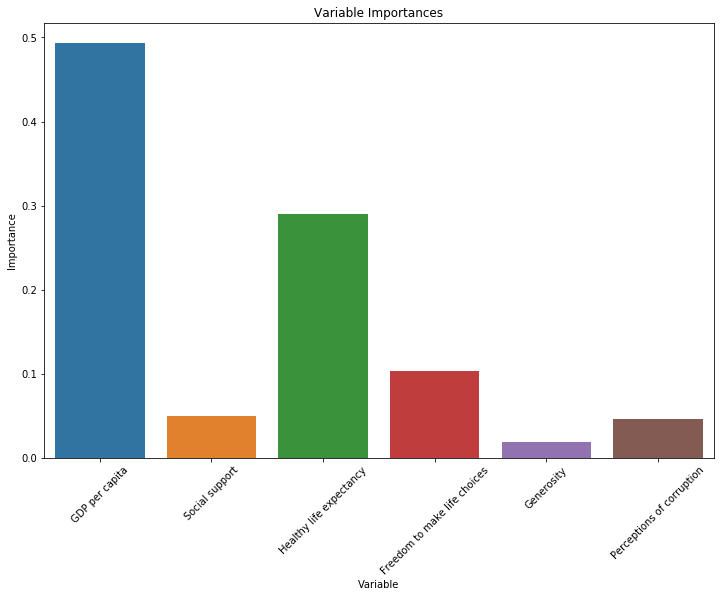

In [161]:
# Listing x locations for plotting
x_values = list(range(len(importances)))
plt.figure(figsize = (12, 8))
# Plotting a bar chart
sns.barplot(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation = 45
           )
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The feature importances are similar to those gotten from the random forest model.

Decision tree models work well for data that is not normally distributed since they are nonparametric. The results from an elastic net regression model may remove some of the coefficients to give a model that uses only the most important attributes to predict happiness.

### LINEAR REGRESSION MODEL

In [0]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [0]:
# Detecting Multicollinearity with independent variables
correlations = X.corr()
correlations

GDP per capita  ...  Perceptions of corruption
GDP per capita                      1.000000  ...                   0.303427
Social support                      0.585966  ...                   0.126707
Healthy life expectancy             0.784338  ...                   0.250390
Freedom to make life choices        0.340511  ...                   0.459705
Generosity                         -0.014560  ...                   0.318995
Perceptions of corruption           0.303427  ...                   1.000000

[6 rows x 6 columns]

In [0]:
# Checking VIF scores
vif =pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

GDP per capita  ...  Perceptions of corruption
GDP per capita                      2.933311  ...                  -0.414399
Social support                     -0.608698  ...                   0.286422
Healthy life expectancy            -1.862010  ...                  -0.007850
Freedom to make life choices        0.034966  ...                  -0.552880
Generosity                          0.161864  ...                  -0.293667
Perceptions of corruption          -0.414399  ...                   1.439253

[6 rows x 6 columns]

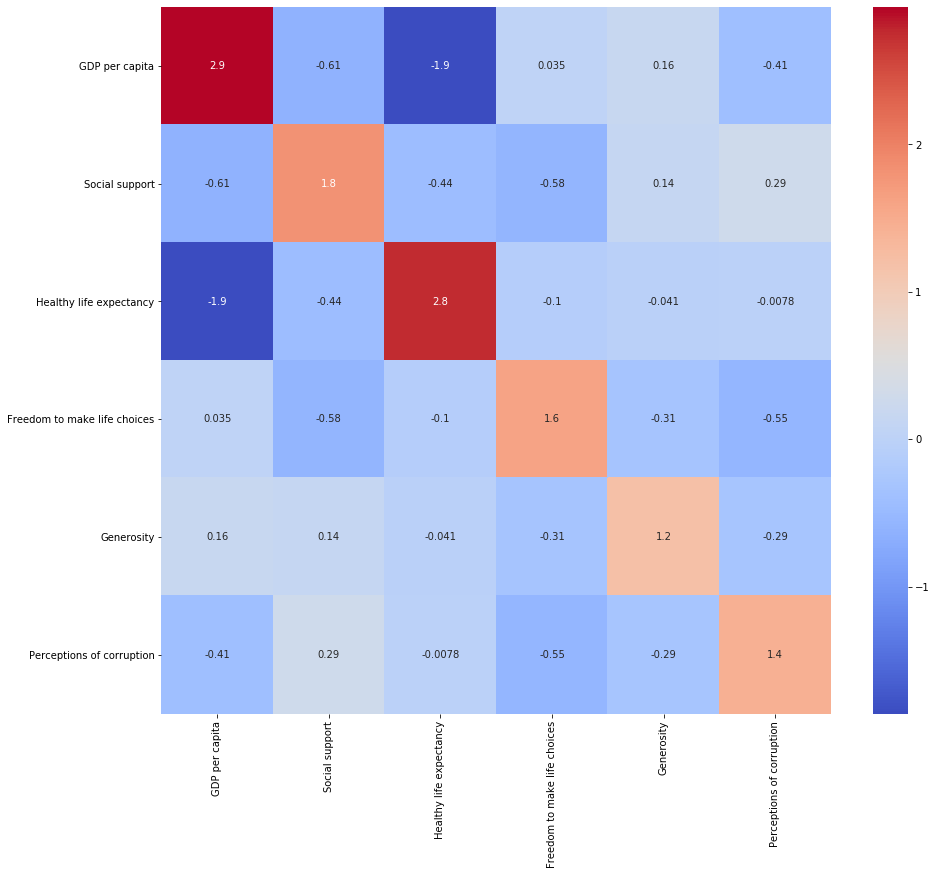

In [0]:
# Heat map of VIF scores
f, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(vif, annot = True, cmap = 'coolwarm',
            xticklabels=vif.columns.values,
            yticklabels=vif.columns.values)

The VIF scores are under 2, so multicollinearity between variables will not affect this model.

### ELASTIC NET REGRESSION

In [171]:
# Normalizing the data and finding the best parameter using a grid
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,10),'l1_ratio':[.1,.2,.4,.6,.8, 1]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.1}


0.2647911659792642

According to the grid search result, the optimal L1 ratio = 0.1, which is closer to ridge regression. Therefore, we are less likely to have any coefficients reduced to zero in this model. The best valule for alpha is 1e-05.

In [176]:
# Setting our hyperparameters to the recommended values and running the model on the data.
elastic=ElasticNet(normalize=True,alpha=1e-05, l1_ratio= 0.1)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
# checking for the accuracy of the model 
print("The accuracy on the training dataset is: %f " %elastic.score(X_train, y_train))
print("The accuracy on the testing dataset is: %f " %elastic.score(X_test, y_test))

# Getting the coefficients for the elastic net model
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

The accuracy on the training dataset is: 0.760151 
The accuracy on the testing dataset is: 0.777727 


{'Freedom to make life choices': 0.19964434025024114,
 'GDP per capita': 0.41002423491561535,
 'Generosity': 0.0639096691072579,
 'Healthy life expectancy': 0.2227685708770048,
 'Perceptions of corruption': 0.08073008193740319,
 'Social support': 0.187849624583817}

There is much less overfitting in this model as the accuracy on the testing data is higher than the train data. 

According to this model, GDP per capita is the most important factor contributing to happiness of citizens. Health, freedom and social support are also important but carry less weight in this model.

In [184]:
# Cross Validation
folds = KFold(n_splits=10)

# Creating and assessing models
RMSES = []
count = 1
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # fit a model accordingly
  elastic=ElasticNet(normalize=True,alpha=1e-05, l1_ratio= 1)
  elastic.fit(X,y)
  
  # assess the accuraccy of the model
  y_pred = elastic.predict(X_test)
  
  # Evaluating the model
  print('Model ' + str(count))
  print("The accuracy on the training dataset is: %f " %elastic.score(X_train, y_train))
  print("The accuracy on the testing dataset is: %f " %elastic.score(X_test, y_test))

  count = count + 1


Training model 1
Model 1
The accuracy on the training dataset is: 0.761130 
The accuracy on the testing dataset is: 0.768593 

Training model 2
Model 2
The accuracy on the training dataset is: 0.766353 
The accuracy on the testing dataset is: 0.753761 

Training model 3
Model 3
The accuracy on the training dataset is: 0.763540 
The accuracy on the testing dataset is: 0.765867 

Training model 4
Model 4
The accuracy on the training dataset is: 0.757229 
The accuracy on the testing dataset is: 0.784364 

Training model 5
Model 5
The accuracy on the training dataset is: 0.766771 
The accuracy on the testing dataset is: 0.744679 

Training model 6
Model 6
The accuracy on the training dataset is: 0.747675 
The accuracy on the testing dataset is: 0.825436 

Training model 7
Model 7
The accuracy on the training dataset is: 0.751187 
The accuracy on the testing dataset is: 0.807022 

Training model 8
Model 8
The accuracy on the training dataset is: 0.761609 
The accuracy on the testing datase

The model performs well on different data sets.

## Evaluating the model

The decision tree models were good estimators of the effects of the different variables on happiness. However, the models were overfitted to training data (even after bagging and boosting).
The elastic net regression model was leaning towards a ridge regression approach, and gave lower accuracy, but the result was similar for both train and test data.

## Conclusion and Recommendations

The models show that GDP per capita is the most important variable for determining the happiness of citizens. A recommendation for governments and policy makers would be to focus on ensuring that the economy is growing to ensure that citizens are happier.

However, health, social support and freedom also have a sizeable effect on the happines of citizens and should not be ignored. 

An interesting observation is that perception of corruption and generousity do not seem to affect happiness much. However, they had a weight that was not small enough to exclude them from the model.

This analysis shows that happiness cannot be increased by only focusing on a single factor, so policies should ensure that the lives of citizens are improved in a balanced manner, and not only focus on economic growth.